<a href="https://colab.research.google.com/github/anchalsingh1708/CALORIES-BURNT-PREDICTION-ML/blob/main/Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn import tree
import sklearn.metrics as sm
from sklearn.preprocessing import PolynomialFeatures

Data Collection and processing

In [ ]:
#loading the data from csv to pandas DataFrame
calories=pd.read_csv('/content/drive/MyDrive/cccc.csv')

In [ ]:
#print the 1st five row of dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [ ]:
calories.isnull().sum()

User_ID     0
Calories    9
dtype: int64

In [ ]:
calories=calories.fillna(value=calories["Calories"].mean())

In [ ]:
calories.isnull().sum()

User_ID     0
Calories    0
dtype: int64

In [ ]:
exercise_data=pd.read_csv('/content/drive/MyDrive/TY FINAL YEAR PROJECT/exercise.csv')

In [ ]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190,94,29,105,40.8
1,14861698,female,20,166,60,14,94,40.3
2,11179863,male,69,179,79,5,88,38.7
3,16180408,female,34,179,71,13,100,40.5
4,17771927,female,27,154,58,10,81,39.8


combining two dataframes

In [ ]:
calories_data=pd.concat([exercise_data,calories['Calories']],axis=1)

In [ ]:
calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231.0
1,14861698,female,20,166,60,14,94,40.3,66.0
2,11179863,male,69,179,79,5,88,38.7,26.0
3,16180408,female,34,179,71,13,100,40.5,71.0
4,17771927,female,27,154,58,10,81,39.8,35.0


Checking the number of rows and columns

In [ ]:
calories_data.shape

(15000, 9)

In [ ]:
#getting information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 1.0+ MB


In [ ]:
#checking for missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [ ]:
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_data = calories_data.copy()

# Apply label encoder to column 'name'
label_encoder = LabelEncoder()
label_data['Gender'] = label_encoder.fit_transform(label_data['Gender'])
label_data.head(7)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190,94,29,105,40.8,231.000000
1,14861698,0,20,166,60,14,94,40.3,66.000000
2,11179863,1,69,179,79,5,88,38.7,26.000000
3,16180408,0,34,179,71,13,100,40.5,71.000000
4,17771927,0,27,154,58,10,81,39.8,35.000000
5,15130815,0,36,151,50,23,96,40.7,123.000000
6,19602372,0,33,158,56,22,95,40.5,89.553399


One Hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cols=['Gender']

# Make copy to avoid changing original data 
OH_data = calories_data.copy()

# Apply one-hot encoder to the columns we have choosen
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(OH_data[cols]))

# One-hot encoding removed index; put it back
OH_cols.index = OH_data.index

# Remove categorical columns (will be replaced with one-hot encoding)
num_X = OH_data.drop(cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X = pd.concat([num_X, OH_cols], axis=1)

OH_X.head(7)

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,0,1
0,14733363,68,190,94,29,105,40.8,231.000000,0.0,1.0
1,14861698,20,166,60,14,94,40.3,66.000000,1.0,0.0
2,11179863,69,179,79,5,88,38.7,26.000000,0.0,1.0
3,16180408,34,179,71,13,100,40.5,71.000000,1.0,0.0
4,17771927,27,154,58,10,81,39.8,35.000000,1.0,0.0
5,15130815,36,151,50,23,96,40.7,123.000000,1.0,0.0
6,19602372,33,158,56,22,95,40.5,89.553399,1.0,0.0


convert height to metres

In [ ]:
label_data['Height'] = label_data['Height'] *0.01

In [ ]:
label_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,1.90,94,29,105,40.8,231.0
1,14861698,0,20,1.66,60,14,94,40.3,66.0
2,11179863,1,69,1.79,79,5,88,38.7,26.0
3,16180408,0,34,1.79,71,13,100,40.5,71.0
4,17771927,0,27,1.54,58,10,81,39.8,35.0


data analysis

In [ ]:
#get some statistical measures about the data
label_data.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,1.744651,74.966867,15.530600,95.518533,40.025453,89.553399
std,2.872851e+06,0.500004,16.980264,0.142581,15.035657,8.319203,9.583328,0.779230,62.441343
min,1.000116e+07,0.000000,20.000000,1.230000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,1.640000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,1.750000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,1.850000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,2.220000,132.000000,30.000000,128.000000,41.500000,314.000000


data visualization

In [ ]:
sns.set()

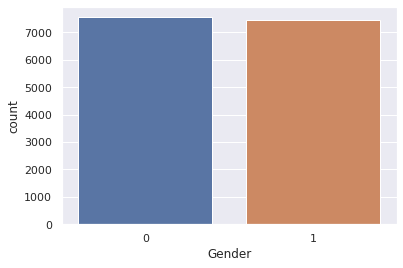

In [ ]:
sns.countplot(data=label_data, x="Gender")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


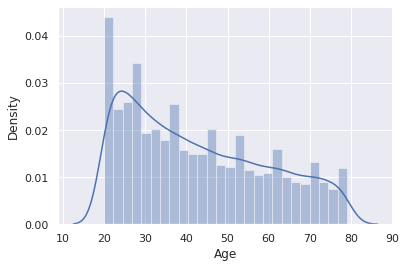

In [ ]:
# finding the distribution of "age" column
sns.distplot(calories_data['Age'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


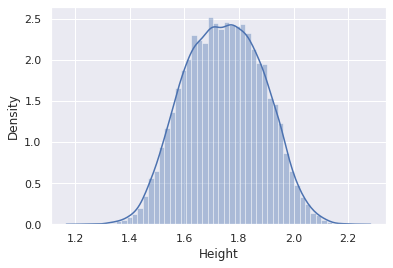

In [ ]:
# finding the distribution of "Height" column
sns.distplot(label_data['Height'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


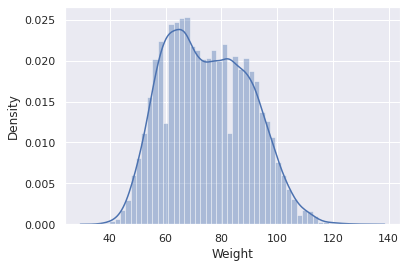

In [ ]:
# finding the distribution of "Weight" column
sns.distplot(calories_data['Weight'])

Finding the Correlation in the dataset

1.positive corelation
2.negative corelation

In [ ]:
correlation=label_data.corr()

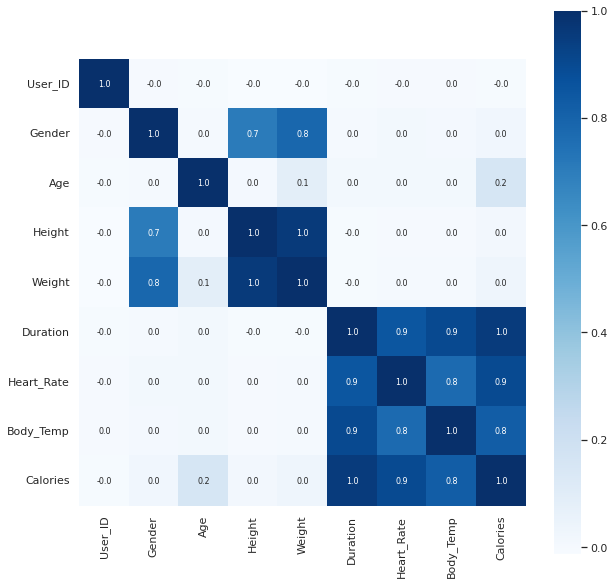

In [ ]:
#constructing heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
x=label_data.drop(columns=['User_ID','Calories'],axis=1)
y=calories_data['Calories']


In [ ]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68    1.90      94        29         105       40.8
1           0   20    1.66      60        14          94       40.3
2           1   69    1.79      79         5          88       38.7
3           0   34    1.79      71        13         100       40.5
4           0   27    1.54      58        10          81       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20    1.93      86        11          92       40.4
14996       0   27    1.65      65         6          85       39.2
14997       0   43    1.59      58        16          90       40.1
14998       1   78    1.93      97         2          84       38.3
14999       1   63    1.73      79        18          92       40.5

[15000 rows x 7 columns]


In [ ]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


In [ ]:
features = x.columns[0:7]

In [ ]:
print(features)

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp'],
      dtype='object')


data standardization

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
#standardized_data=scaler.transform(x)

In [ ]:
#print(standardized_data)

In [ ]:
#x=standardized_data
#y=calories_data['Calories']

In [ ]:
#print(x)
#print(y)

splitting the data into training and test data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


LASSO AND RIDGE

In [ ]:
#Model
lr = LinearRegression()
#Fit model
lr.fit(X_train, Y_train)
#predict
#prediction = lr.predict(X_test)
#actual
actual = Y_test
train_score_lr = lr.score(X_train, Y_train)
test_score_lr = lr.score(X_test, Y_test)
print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train,Y_train)
#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, Y_train)
test_score_ridge = ridgeReg.score(X_test, Y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.9668556802413573
The test score for lr model is 0.9657446236790425

Ridge Model............................................

The train score for ridge model is 0.9668365089463112
The test score for ridge model is 0.9657599843482855


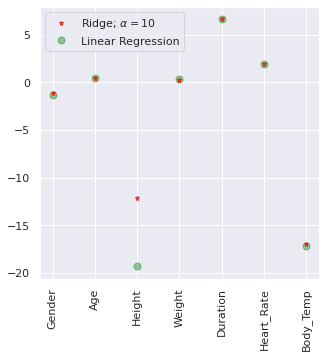

In [ ]:
plt.figure(figsize = (5, 5))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',
         markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',
         marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [ ]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,Y_train)
train_score_ls =lasso.score(X_train,Y_train)
test_score_ls =lasso.score(X_test,Y_test)
print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.957725228939531
The test score for ls model is 0.9568294200420112


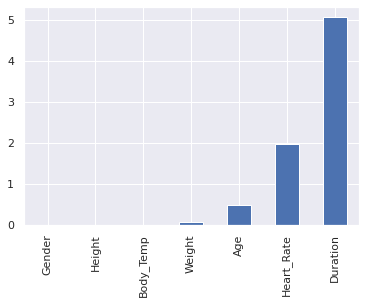

In [ ]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = 'bar')


0.9668556778805667
0.9657450143872797


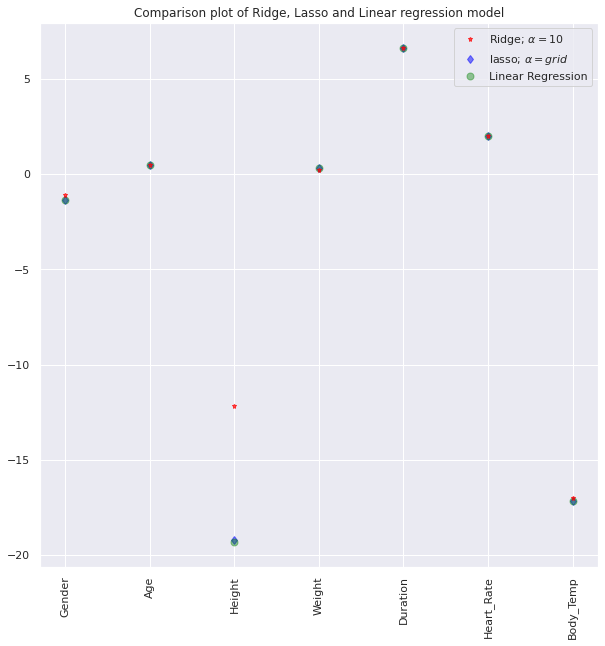

In [ ]:
#Using the linear CV model
from sklearn.linear_model import LassoCV
 
#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, Y_train)
 
 
#score
print(lasso_cv.score(X_train, Y_train))
print(lasso_cv.score(X_test, Y_test))
 
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
 
#addd plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')
 
#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
 
#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()
 


Model training

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=regressor.predict(X_test)

In [ ]:
print('Train Score: ',regressor.score(X_train,Y_train))
print('Test Score: ',regressor.score(X_test,Y_test))

Train Score:  0.9668556802413573
Test Score:  0.9657446236790425


In [ ]:
regressor.predict([[1,68,1.90,94,29,105,40.8]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([199.40087115])

In [ ]:
#Fitting the Polynomial regression to the dataset
poly_regs=PolynomialFeatures(degree=5)
x_poly=poly_regs.fit_transform(X_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_poly,Y_train)

LinearRegression()

In [ ]:
poly_pred=lin_reg_2.predict(poly_regs.fit_transform([[1,68,1.90,94,29,105,40.8]]))
print(poly_pred)


[231.18902439]


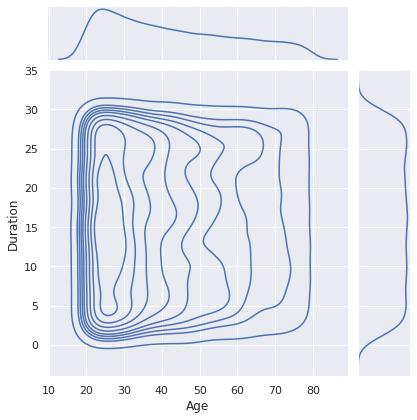

In [ ]:
sns.jointplot(x ='Age', y ='Duration', data = label_data,kind='kde')


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


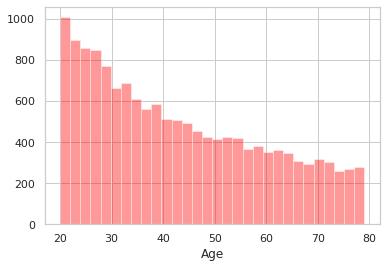

In [ ]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(label_data['Age'], kde = False, color ='red', bins = 30)
